# Recommender system

## Library import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## Imports libraies

In [2]:
movies = "../lab_data/movies.csv"
ratings = "../lab_data/ratings.csv"

df_movies = pd.read_csv(movies, usecols=["movieId", "title"], dtype={"movieId": "int32", "title": "str"})
df_ratings = pd.read_csv(ratings, usecols=["userId", "movieId", "rating"], dtype={"userId": "int32", "movieId": "int32", "rating": "float32"})
## Reads in the data

## EDA

### Info and describe

In [17]:
df_movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [18]:
df_ratings.head()

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5


In [19]:
df_movies.info(), df_movies.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int32 
 1   title    58098 non-null  object
dtypes: int32(1), object(1)
memory usage: 681.0+ KB


(None,
              movieId
 count   58098.000000
 mean   111919.516197
 std     59862.660956
 min         1.000000
 25%     72437.750000
 50%    126549.000000
 75%    161449.500000
 max    193886.000000)

In [20]:
df_ratings.info(), df_ratings.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int32  
 1   movieId  int32  
 2   rating   float32
dtypes: float32(1), int32(2)
memory usage: 317.6 MB


(None,
              userId       movieId        rating
 count  2.775344e+07  2.775344e+07  2.775344e+07
 mean   1.419420e+05  1.848800e+04  3.530446e+00
 std    8.170740e+04  3.510263e+04  1.066353e+00
 min    1.000000e+00  1.000000e+00  5.000000e-01
 25%    7.117600e+04  1.097000e+03  3.000000e+00
 50%    1.420220e+05  2.716000e+03  3.500000e+00
 75%    2.124590e+05  7.150000e+03  4.000000e+00
 max    2.832280e+05  1.938860e+05  5.000000e+00)

### 10 most rated movies

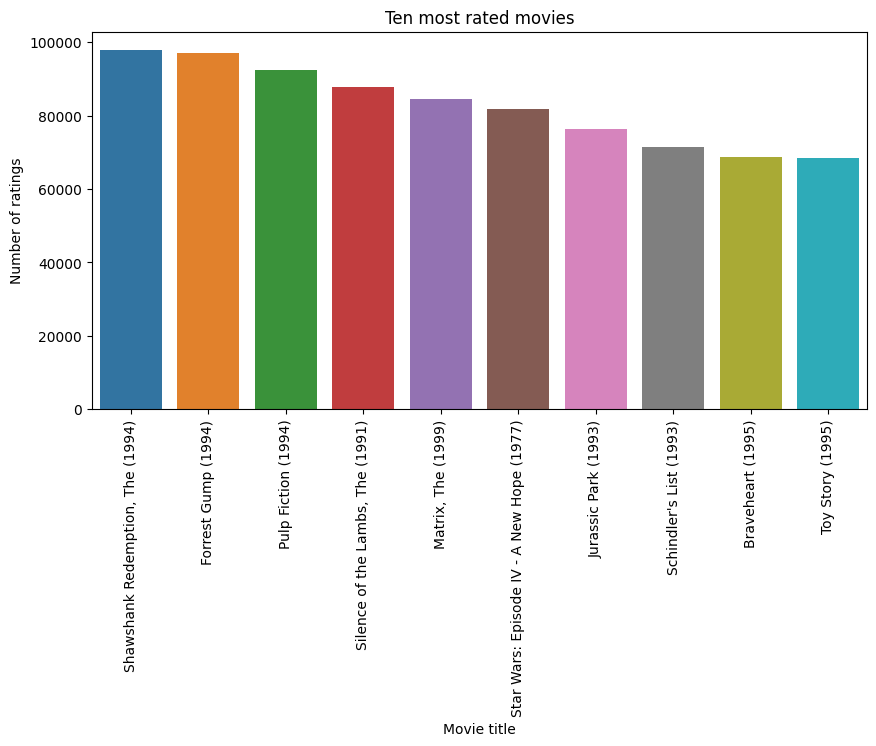

In [21]:
## Code insperation taken from https://datatofish.com/count-duplicates-pandas/
df_ratings_pivot = df_ratings.pivot_table(columns=["movieId"], aggfunc="size").to_frame() ## Creats a pivoted table where the amount of occurances of all movieIds are added
df_ratings_pivot = df_ratings_pivot.reset_index()
df_ratings_pivot = df_ratings_pivot.rename({0: "Number of ratings"}, axis = "columns")
df_ratings_pivot = df_ratings_pivot.sort_values(ascending = False, by = "Number of ratings")
ten_most_rated_movieId = df_ratings_pivot["movieId"].head(10).to_list() ## Takes out the top 10 movies and makes a list of them
ten_most_rated_movies = df_movies[df_movies["movieId"].isin(ten_most_rated_movieId)] ## Takes out the top 10 most populare movies
most_rated_movies = pd.concat([df_ratings_pivot["Number of ratings"].head(10), ten_most_rated_movies["title"]], axis=1) ## Creats a new data frame with the ten most popular movies and thier titles 
plt.figure(figsize=(10,5), dpi=100)
top_10_movies = sns.barplot(data = most_rated_movies, x="title", y="Number of ratings")
top_10_movies.set(title = "Ten most rated movies", xlabel="Movie title")
plt.xticks(rotation=90)
plt.show()

### Mean rating on the 10 most rated movies

In [22]:
movieId_index = 0
mean_rating_list = []

for _ in ten_most_rated_movieId:
    specifed_movie = df_ratings[ # Takes out one movie from a give list and df in this case the one of the ten_most_rated_movies
    df_ratings["movieId"].isin([ten_most_rated_movieId[movieId_index]])
    ]

    rating_count = ( ## Takes out the amout of total entries in specified movie
        specifed_movie.pivot_table(columns=["movieId"], aggfunc="size")
        .to_frame()
        .reset_index()
        .rename({0: "number_of_entries"}, axis="columns")
    )

    total_rating = specifed_movie["rating"].sum() ## Calulates the total amount of ratings
    rating_count = rating_count["number_of_entries"].to_list()
    mean_rating = total_rating/ rating_count[0]
    mean_rating_list.append(mean_rating)

    movieId_index += 1

most_rated_movies["movieId"] = ten_most_rated_movieId
most_rated_movies["mean_rating"] = mean_rating_list

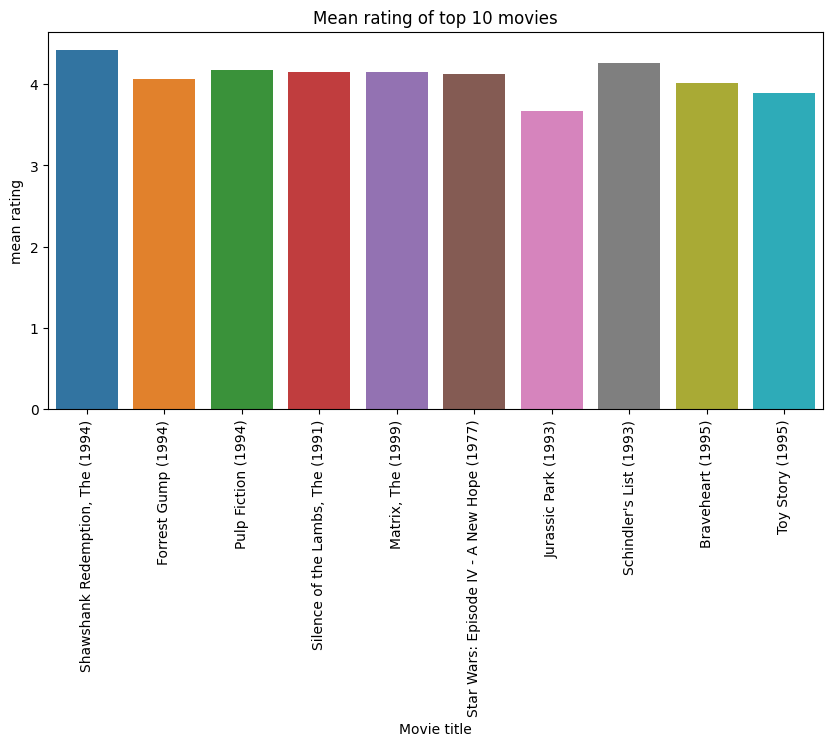

In [23]:
plt.figure(figsize=(10,5), dpi=100)
top_ten_mean_rating = sns.barplot(data = most_rated_movies, x="title", y="mean_rating")
top_ten_mean_rating.set(title="Mean rating of top 10 movies", xlabel="Movie title", ylabel="mean rating")
plt.xticks(rotation=90)
plt.show()

### Plot for movies per year

In [24]:
list_of_year = ["187", "188", "189", "190", "191", "192", "193", "194", "195", "196", "197", "198", "199", "200", "201"] ## List of decades

## Taken from https://datascienceparichay.com/article/pandas-search-for-string-in-dataframe-column/
for i, char in enumerate(list_of_year):
    movies_per_year = df_movies[df_movies["title"].str.contains(f"\({list_of_year[i]}")] ## Checks which year a movie comes from
    movies_per_year["Decade"] = char + "0" ## Asigns a decad to the every movie
    if i == 0:
        movies_with_years = pd.DataFrame(movies_per_year)
    else:
        movies_with_years = pd.concat([movies_with_years, movies_per_year], axis=0)


movies_with_years = movies_with_years.reset_index(drop=True)
df_decades = movies_with_years.pivot_table(columns=["Decade"], aggfunc="size").to_frame() ## Calculates how many movies there are from each decad
df_decades = df_decades.reset_index().rename({0: "Occurance_in_data"}, axis = 1)

C:\Users\FabianAndersson-AIU2\AppData\Local\Temp\ipykernel_10772\2111917770.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_per_year["Decade"] = char + "0" ## Asigns a decad to the every movie
C:\Users\FabianAndersson-AIU2\AppData\Local\Temp\ipykernel_10772\2111917770.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_per_year["Decade"] = char + "0" ## Asigns a decad to the every movie
C:\Users\FabianAndersson-AIU2\AppData\Local\Temp\ipykernel_10772\2111917770.py:6: SettingWithCopyWarning

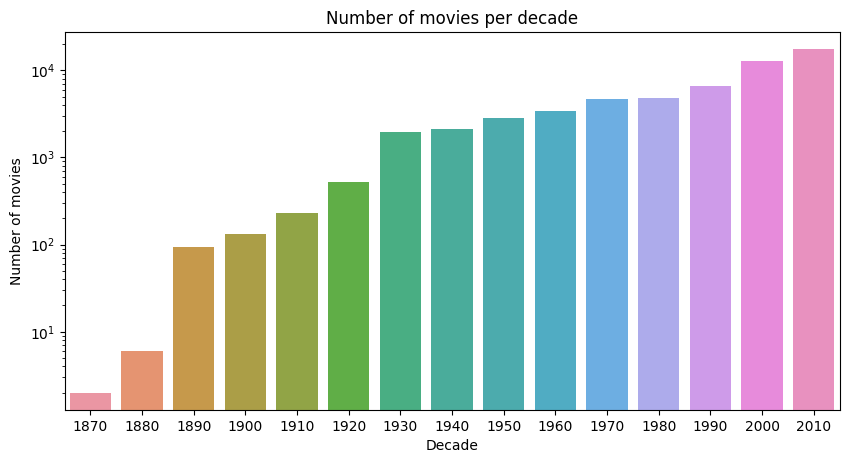

In [25]:
plt.figure(figsize=(10,5), dpi=100)
decade_plot = sns.barplot(data = df_decades, x="Decade", y="Occurance_in_data")
decade_plot.set(yscale="log", title="Number of movies per decade", ylabel="Number of movies")
plt.show()

### Number ratings on movieId

<AxesSubplot:xlabel='movieId', ylabel='Number of ratings'>

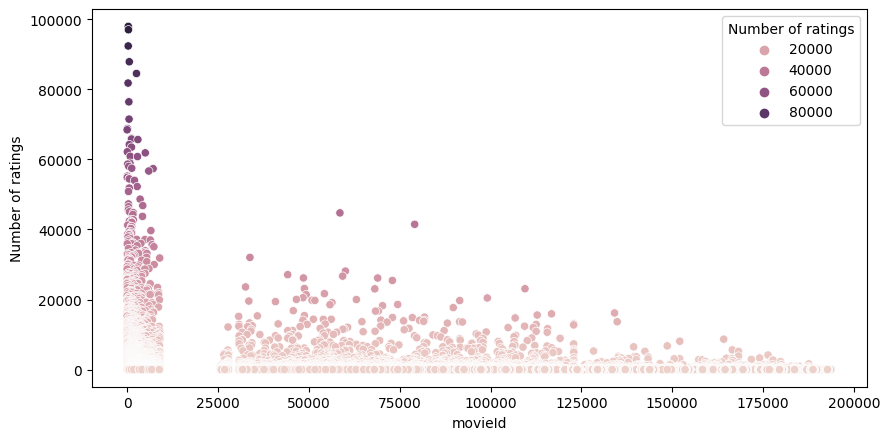

In [26]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data = df_ratings_pivot, x="movieId", y="Number of ratings", hue = "Number of ratings")

## Sparse matrix

### Cleaning the data

In [27]:
low_ratings = 0
movieId_index = 0
list_mean_rating = []

df_ratings_per_movie = ( ## Creats a pivot table of movieId with the total number of occurance in the data
    df_ratings.pivot_table(columns=["movieId"], aggfunc="size")
    .to_frame()
    .reset_index()
    .rename({0: "number_of_ratings"}, axis=1)
    .sort_values(by="number_of_ratings", ascending=True)
)

for i in range(1001): ## Loops 1001 and removes all the movies with a total number of ratings under 1000
    low_ratings_movies = df_ratings_per_movie[df_ratings_per_movie["number_of_ratings"].isin([low_ratings])]
    
    if low_ratings == 0: ## Creats a new dataframe
        df_low_ratings_movies = pd.DataFrame(low_ratings_movies)
        low_ratings +=1
    else: ## Adds more rows to the dataframe
        df_low_ratings_movies = pd.concat([df_low_ratings_movies, low_ratings_movies], axis=0)
        low_ratings += 1

movies_to_drop_list = df_low_ratings_movies["movieId"].to_list() ## Takes the movieId and creats a list based on them
df_movies_to_drop = df_ratings[df_ratings["movieId"].isin(movies_to_drop_list)].reset_index().rename({"index": "index_to_drop"}, axis = 1)
df_movie_index_to_drop = df_movies_to_drop["index_to_drop"].to_list()

df_ratings_cleaned = df_ratings.drop(df_movie_index_to_drop)

In [28]:
df_ratings_cleaned_movieId_pivot = df_ratings_cleaned.pivot_table(columns=["movieId"], aggfunc="size").to_frame().reset_index().rename({0: "data_occurance"}, axis=1)
movie_index = 0
list_mean_rating = []

for _ in range(len(df_ratings_cleaned_movieId_pivot)): ## Loops though the data and calulates the mean rating of all the movies
    movie_specified = df_ratings_cleaned_movieId_pivot.iloc[movie_index].to_list()
    specifiec_movie = df_ratings_cleaned[df_ratings_cleaned["movieId"].isin([movie_specified[0]])]
    rating_count = specifed_movie["rating"].sum()
    mean_rating = rating_count/movie_specified[1]
    list_mean_rating.append(mean_rating)
    movie_index += 1


In [29]:
df_ratings_cleaned_movieId_pivot["mean_rating"] = list_mean_rating

In [30]:
movie_index = 0
movie_list = []
for _ in range(len(df_ratings_cleaned_movieId_pivot)): ## Loops through the data and removes all the movies with a low mean rating
    movie_specified = df_ratings_cleaned_movieId_pivot.iloc[movie_index].to_list()
    movie_mean_rating = movie_specified[2]
    movieId = movie_specified[0] ## Takes out a specific movieId
    if movie_mean_rating <= 3:
        movie_list.append(movieId)
        movieId_index += 1
    else:
        movieId_index += 1
    movie_index += 1

In [31]:
df_movies_to_remove = df_ratings_cleaned[df_ratings_cleaned["movieId"].isin(movie_list)].reset_index().rename({"index": "index_to_drop"}, axis = 1)
list_index_to_drop = df_movies_to_remove["index_to_drop"].to_list()
df_ratings_cleaned = df_ratings_cleaned.drop(list_index_to_drop).reset_index(drop=True)

In [32]:
df_ratings_cleaned

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5
...,...,...,...
24614124,283228,8228,5.0
24614125,283228,8542,4.5
24614126,283228,34405,4.5
24614127,283228,44761,4.5


### Pivot matrix

In [33]:
movies_users = df_ratings_cleaned.pivot(index="movieId", columns="userId", values = "rating").fillna(0) ## Pivots the dataframe with index based on movie Id and columns based on userId
movies_users

userId,1,2,3,4,5,6,7,8,9,10,...,283219,283220,283221,283222,283223,283224,283225,283226,283227,283228
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,5.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5
2,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process

C:\Users\FabianAndersson-AIU2\.virtualenvs\Machinelearning-Fabian-Andersson-w7oPBvBJ\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [35]:
mat_movies_users = csr_matrix(movies_users.values)

In [36]:
model_KNN = NearestNeighbors(metric="cosine", algorithm="brute", n_neighbors=20)
model_KNN.fit(mat_movies_users)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

In [53]:
mat_movies_users.todense()

matrix([[0. , 0. , 0. , ..., 0. , 0. , 4.5],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        ...,
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ]], dtype=float32)

### Recommender system
- Code insperation taken from https://www.youtube.com/watch?v=4Ws0oPH350U

In [51]:
def recommender_system(movie_name, data, model, n_recommendations): ## Takes a movie and gives you recommendations based on movies that are rated close to it
    model.fit(data)
    index = process.extractOne(movie_name, df_movies["title"])[2] ## Takes out the index for a movie title
    print("Movie Selected: ", df_movies["title"][index], "Index: ", index)
    distance, indecies = model.kneighbors(data[index], n_neighbors = n_recommendations) ## Calulates the nearest neighbors to the selected movies postition
    for i in indecies: ## Prints n closest movies to the selected movie and does not print the selected movies
        print(df_movies["title"][i].where(i!=index))

recommender_system("Lord of the rings", mat_movies_users, model_KNN, 5)

Movie Selected:  Star Wars: Episode IV - A New Hope (1977) Index:  257
257                                    NaN
335         While You Were Sleeping (1995)
237                        Hideaway (1995)
266    My Crazy Life (Mi vida loca) (1993)
162           Devil in a Blue Dress (1995)
Name: title, dtype: object


#### How does the system work?
- My recommender system works by taking in a dataset with columns based on what the system should look at. After that it sorts the datapoints in to groups based on what information they contain. This will allow movies with similar rating, number of ratings and similar users to be group together.
- The system then takes in a movie name and finds that point in the dataset and looks at the degree to other data points and takes out the five movies with the lowest degree to the selected movie.


#### General recommender system
##### Netflix recommender system: https://help.netflix.com/en/node/100639?msclkid=83a92061aaa211ecb13db5d128cfb1e7
- Netflix recommendation system works in a similar way. It looks at:
    - What you watch.
    - What you rate the things you watch
    - Genres of the things you watch
- Which then looks at movies and shows with similar attributes to what you have shown to like in the past. It also looks at what other people with similar tastes to you like, are watching and have watched. Which then recommends shows and movies based on the given parameters

# Disease prediction

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

## Imports libraies

df_medical_data = pd.read_csv("../lab_data/cardio_train.csv", sep=";")
df_medical_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## EDA

Active disease: 35021, No active disease: 34979


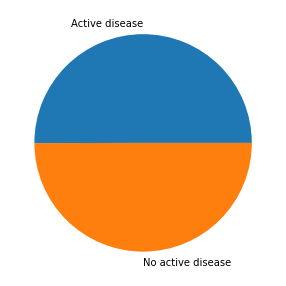

In [4]:
cardio_active = df_medical_data.pivot_table(columns=["cardio"], aggfunc="size").to_list()
cardio_data = [cardio_active[0], cardio_active[1]]

print(f"Active disease: {cardio_active[0]}, No active disease: {cardio_active[1]}")
plt.figure(figsize=(5, 5))
plt.pie(cardio_data, labels = ["Active disease", "No active disease"])
plt.show()

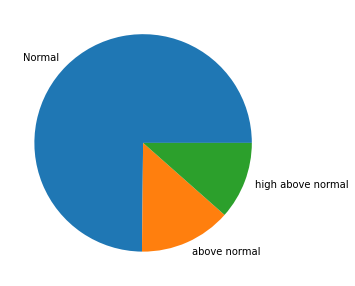

In [3]:
choleserol_values = df_medical_data.pivot_table(columns=["cholesterol"], aggfunc="size").to_list()
choleserol_labels = ["Normal", "above normal", "high above normal"]
choleserol_data = [choleserol_values[0], choleserol_values[1], choleserol_values[2]]

plt.figure(figsize = (5, 5))
plt.pie(choleserol_data, labels = choleserol_labels)
plt.show()

In [3]:
df_medical_data["age"] = df_medical_data["age"]/365
df_medical_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
df_medical_data["age"] = df_medical_data["age"].round(0)
df_medical_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53.0,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62.0,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52.0,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61.0,1,163,72.0,135,80,1,2,0,0,0,1


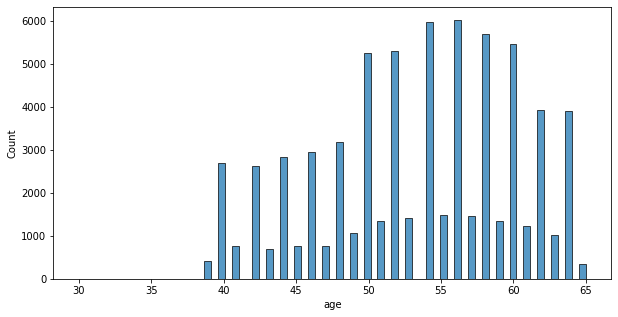

In [39]:
plt.figure(figsize=(10,5))
sns.histplot(data = df_medical_data, x="age")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

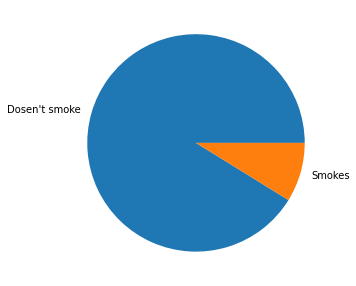

In [7]:
smokers = df_medical_data.pivot_table(columns=["smoke"], aggfunc="size").to_list()

smoke_data = [smokers[0], smokers[1]]
smoke_labels = ["Dosen't smoke", "Smokes"]

plt.figure(figsize=(5,5))
plt.pie(smoke_data, labels=smoke_labels)
plt.show

Lowest weight in dataset: [10.0] | Highest weight in dataset: [200.0]


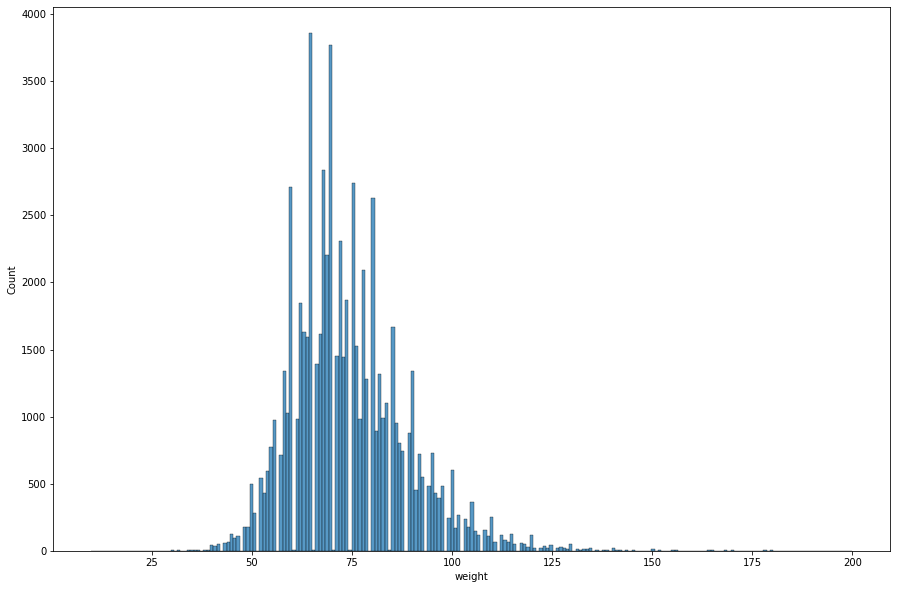

In [8]:
lowest_weight = df_medical_data["weight"].sort_values(ascending=True).head(1).tolist()
highest_weight = df_medical_data["weight"].sort_values(ascending=False).head(1).tolist()
print(f"Lowest weight in dataset: {lowest_weight} | Highest weight in dataset: {highest_weight}")
plt.figure(figsize=(15,10))
sns.histplot(data=df_medical_data, x="weight")
plt.show()

shortest in dataset: [55] cm | Tallest in dataset: [250] cm


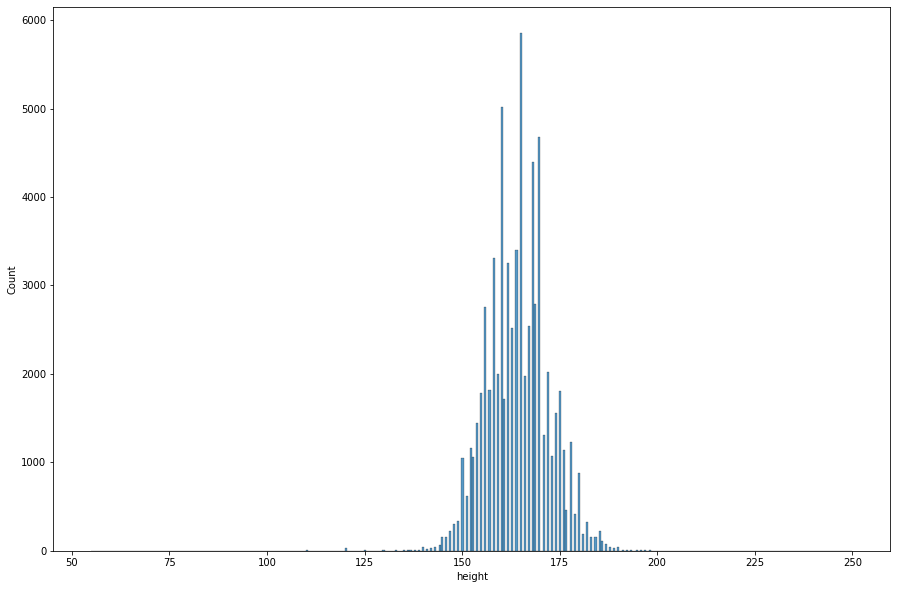

In [11]:
tallest_in_data = df_medical_data["height"].sort_values(ascending=False).head(1).tolist()
shorest_in_data = df_medical_data["height"].sort_values(ascending=True).head(1).tolist()
print(f"shortest in dataset: {shorest_in_data} cm | Tallest in dataset: {tallest_in_data} cm")
plt.figure(figsize=(15,10))
sns.histplot(data=df_medical_data, x="height")
plt.show()

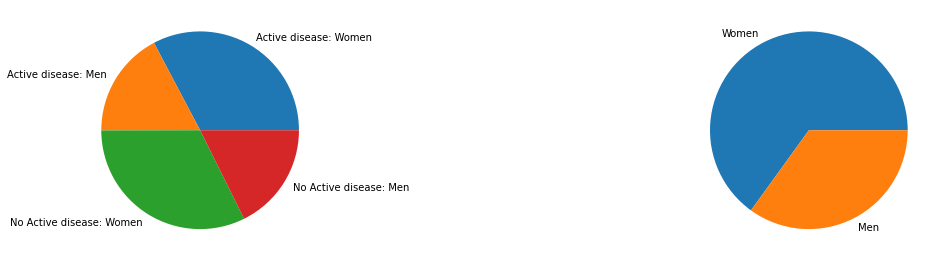

In [9]:
gender_dist = df_medical_data.pivot_table(columns=["gender"], aggfunc="size").to_list()
total_women = gender_dist[0]
total_men = gender_dist[1]
total_gender_data = [total_women, total_men]
total_gender_labels = ["Women", "Men"]

active_heart_disease = df_medical_data[df_medical_data["cardio"].isin([0])]
active_disease_dist = active_heart_disease.pivot_table(columns=["gender"], aggfunc="size").to_list()
women_active_disease = active_disease_dist[0]
men_acive_disease = active_disease_dist[1]

no_active_heart_disease = df_medical_data[df_medical_data["cardio"].isin([1])]
no_active_disease_dist = no_active_heart_disease.pivot_table(columns=["gender"], aggfunc="size").to_list()
women_no_active_disease = no_active_disease_dist[0]
men_no_acive_disease = no_active_disease_dist[1]

gender_heart_disease_data = [women_active_disease, men_acive_disease, women_no_active_disease, men_no_acive_disease]
gender_heart_disease_labels = ["Active disease: Women", "Active disease: Men", "No Active disease: Women", "No Active disease: Men"]

# subplot2grid code taken from https://stackoverflow.com/questions/38438220/arrangement-of-pie-charts-using-matplotlib-subplot
fig = plt.subplots(figsize=(20,10))
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(gender_heart_disease_data, labels = gender_heart_disease_labels)
ax2 = plt.subplot2grid((2,2), (0,1))
plt.pie(total_gender_data, labels = total_gender_labels)
plt.show()

## BMI: Body mass index
I decied to remove the rows where the BMI was above 55 and below 15 because in those rows i saw that the height and weight either began to get to close to eachother where they where almost the same or the height and weight where extremly far away from eachother

In [5]:
df_medical_data["BMI"] = df_medical_data["weight"]/((df_medical_data["height"]/100)**2) ## Calulates the BMI
df_medical_data["BMI"] = df_medical_data["BMI"].round(0)
BMI_above_55 = df_medical_data.index[df_medical_data["BMI"] > 55].to_list() ## Takes out the BMI above 55
BMI_below_15 = df_medical_data.index[df_medical_data["BMI"] < 15].to_list() ## Takes out BMI below 15
BMI_rows_to_drop = BMI_below_15 + BMI_above_55
df_medical_data_clean = df_medical_data.drop(BMI_rows_to_drop)
df_medical_data_clean = df_medical_data_clean.reset_index(drop=True)

normal_BMI_index = df_medical_data_clean.index[df_medical_data_clean["BMI"]<=25].to_list()
overweight_BMI_index = df_medical_data_clean.index[df_medical_data_clean["BMI"] <= 30].to_list()
obess_class1_BMI_index = df_medical_data_clean.index[df_medical_data_clean["BMI"] <= 35].to_list()
obess_class2_BMI_index = df_medical_data_clean.index[df_medical_data_clean["BMI"] > 35].to_list()
obess_class3_BMI_index = df_medical_data_clean.index[df_medical_data_clean["BMI"] > 40].to_list()

In [6]:
df_medical_data_clean.loc[obess_class2_BMI_index, "BMI_class"] = "Obess(class2) BMI"
df_medical_data_clean.loc[obess_class3_BMI_index, "BMI_class"] = "Obess(class3) BMI"

df_medical_data_clean.loc[obess_class1_BMI_index, "BMI_class"] = "Obess(class1) BMI"
df_medical_data_clean.loc[overweight_BMI_index, "BMI_class"] = "overweight BMI"
df_medical_data_clean.loc[normal_BMI_index, "BMI_class"] = "normal BMI"

weight_outliers = df_medical_data_clean.index[df_medical_data_clean["weight"] > 150].to_list()
df_medical_data_clean = df_medical_data_clean.drop(weight_outliers).reset_index(drop=True)

height_outliers = df_medical_data_clean.index[df_medical_data_clean["height"] < 130].to_list()
df_medical_data_clean = df_medical_data_clean.drop(height_outliers).reset_index(drop=True)

## Blood pressure
- Systolic blood pressure
    - I decieded to remove blood pressure below 50 because it is a abnormaliy low blood pressure
    - I also decieded to remove the blood pressure above 350 because it is a high value that isn't way to high
    - I also choose these values because we are dealing with cardio vascular disease and need both healthy and unhealthy data
- Diastolic blood pressure
    - I decieded to remove the diastolic blood pressure levels below 20 with the same resoning as with the systolic blood pressure
    - Then I also choose to remove the diastolic blood pressure levels above 250 with similar resoning as with the systolic blood pressure

In [7]:
too_low_systolic_blood_pressure = df_medical_data_clean.index[df_medical_data_clean["ap_hi"] < 50].to_list()
too_high_systolic_blood_pressure = df_medical_data_clean.index[df_medical_data_clean["ap_hi"] > 350].to_list()
df_medical_data_clean = df_medical_data_clean.drop((too_high_systolic_blood_pressure + too_low_systolic_blood_pressure)).reset_index(drop=True)

too_low_diastolic_blood_pressure = df_medical_data_clean.index[df_medical_data_clean["ap_lo"] < 20].to_list()
too_high_diastolic_blood_pressure = df_medical_data_clean.index[df_medical_data_clean["ap_lo"] > 250].to_list()
df_medical_data_clean = df_medical_data_clean.drop((too_high_diastolic_blood_pressure + too_low_diastolic_blood_pressure)).reset_index(drop=True)

## Blood pressure categorisation
elevated_blood_pressure = df_medical_data_clean[df_medical_data_clean["ap_hi"] <= 129]
elevated_blood_pressure_index = elevated_blood_pressure.index[elevated_blood_pressure["ap_lo"] < 80].to_list()

healthy_blood_pressure_index = elevated_blood_pressure.index[elevated_blood_pressure["ap_hi"] < 120].to_list()

hypertension_1 = df_medical_data_clean[df_medical_data_clean["ap_hi"] <= 139]
hypertension_1_index = hypertension_1.index[hypertension_1["ap_hi"] >= 130].to_list()
hypertension_1_ap_lo = df_medical_data_clean[df_medical_data_clean["ap_lo"] >= 80]
hypertension_1_ap_lo_index = hypertension_1_ap_lo.index[hypertension_1_ap_lo["ap_lo"] <= 89].to_list()

hypertension_2_ap_lo_index = df_medical_data_clean.index[df_medical_data_clean["ap_lo"] >= 90].to_list()
hypertension_2_index = df_medical_data_clean.index[df_medical_data_clean["ap_hi"] >= 140].to_list()

hypertension_crisis_ap_lo_index = df_medical_data_clean.index[df_medical_data_clean["ap_lo"] >= 120].to_list()
hypertension_crisis_index = df_medical_data_clean.index[df_medical_data_clean["ap_hi"] >= 180].to_list()

df_medical_data_clean.loc[hypertension_1_index, "Blood_pressure_class"] = "Hypertension 1"
df_medical_data_clean.loc[elevated_blood_pressure_index, "Blood_pressure_class"] = "Elevated"
df_medical_data_clean.loc[hypertension_1_ap_lo_index, "Blood_pressure_class"] = "Hypertension 1"
df_medical_data_clean.loc[healthy_blood_pressure_index, "Blood_pressure_class"] = "Healthy"
df_medical_data_clean.loc[hypertension_2_ap_lo_index, "Blood_pressure_class"] = "Hypertension 2"
df_medical_data_clean.loc[hypertension_2_index, "Blood_pressure_class"] = "Hypertension 2"
df_medical_data_clean.loc[hypertension_crisis_ap_lo_index, "Blood_pressure_class"] = "Hypertension Crisis"
df_medical_data_clean.loc[hypertension_crisis_index, "Blood_pressure_class"] = "Hypertension Crisis"

## Plots for active disease on different features

<AxesSubplot:xlabel='age', ylabel='age_count'>

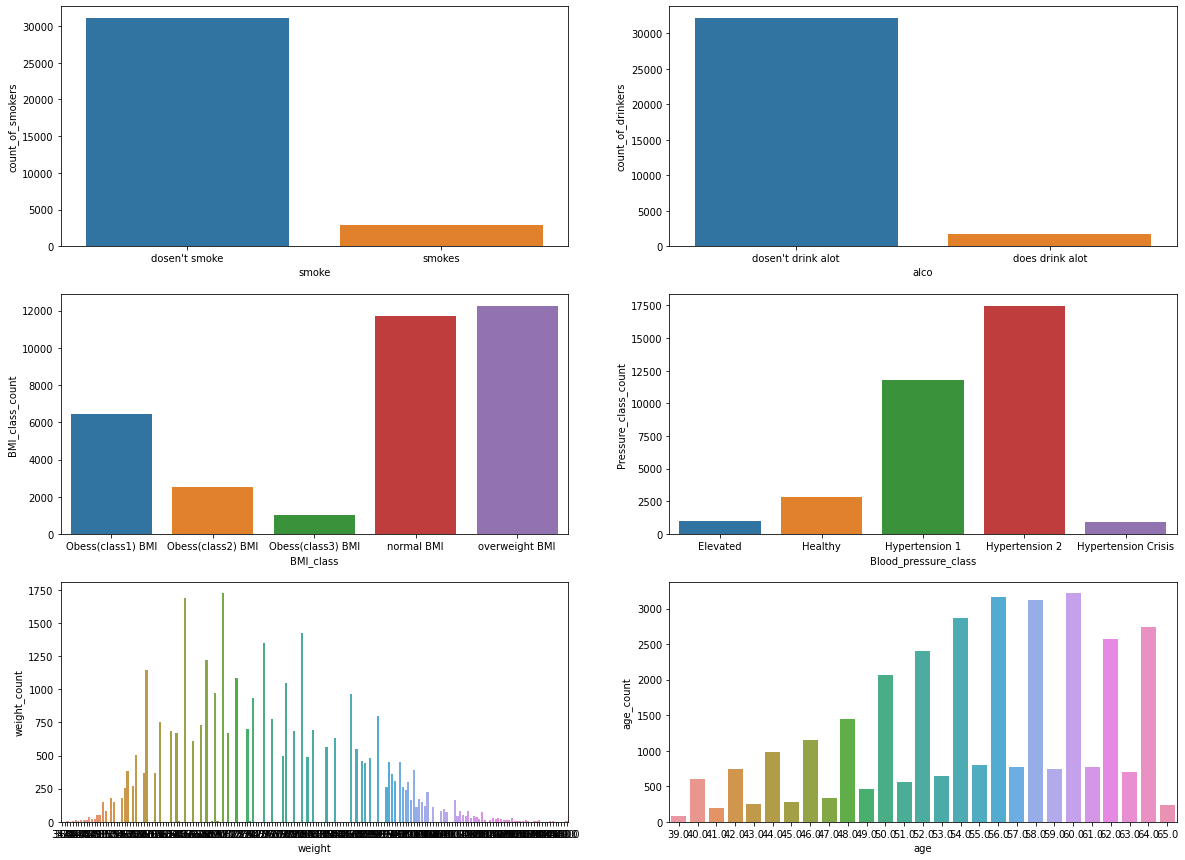

In [8]:
fig, ax = plt.subplots(3, 2, figsize=(20,15))

active_disease_data = df_medical_data_clean[df_medical_data_clean["cardio"].isin([1])] ## Takes all with cardio vascular disease

smokers_data = active_disease_data.pivot_table(columns=["smoke"], aggfunc="size").to_frame().reset_index().rename({0: "count_of_smokers"}, axis=1)
smokers_data.loc[smokers_data["smoke"] == 0, "smoke"] = "dosen't smoke"
smokers_data.loc[smokers_data["smoke"] == 1, "smoke"] = "smokes"
sns.barplot(data = smokers_data, x="smoke", y="count_of_smokers", ax=ax[0, 0])

drinker_data = active_disease_data.pivot_table(columns=["alco"], aggfunc="size").to_frame().reset_index().rename({0: "count_of_drinkers"}, axis=1)
drinker_data.loc[drinker_data["alco"] == 0, "alco"] = "dosen't drink alot"
drinker_data.loc[drinker_data["alco"] == 1, "alco"] = "does drink alot"
sns.barplot(data = drinker_data, x="alco", y="count_of_drinkers", ax=ax[0, 1]) ## Creats a

BMI_data = active_disease_data.pivot_table(columns=["BMI_class"], aggfunc="size").to_frame().reset_index().rename({0: "BMI_class_count"}, axis=1)
sns.barplot(data = BMI_data, x="BMI_class", y="BMI_class_count", ax=ax[1, 0])

Blood_pressure_data = active_disease_data.pivot_table(columns=["Blood_pressure_class"], aggfunc="size").to_frame().reset_index().rename({0: "Pressure_class_count"}, axis=1)
sns.barplot(data = Blood_pressure_data, x="Blood_pressure_class", y="Pressure_class_count", ax=ax[1, 1])

weight_data = active_disease_data.pivot_table(columns=["weight"], aggfunc="size").to_frame().reset_index().rename({0: "weight_count"}, axis=1)
sns.barplot(data = weight_data, x = "weight", y = "weight_count", ax=ax[2, 0])

age_data = active_disease_data.pivot_table(columns=["age"], aggfunc="size").to_frame().reset_index().rename({0: "age_count"}, axis=1)
sns.barplot(data = age_data, x = "age", y = "age_count", ax=ax[2, 1])

<AxesSubplot:>

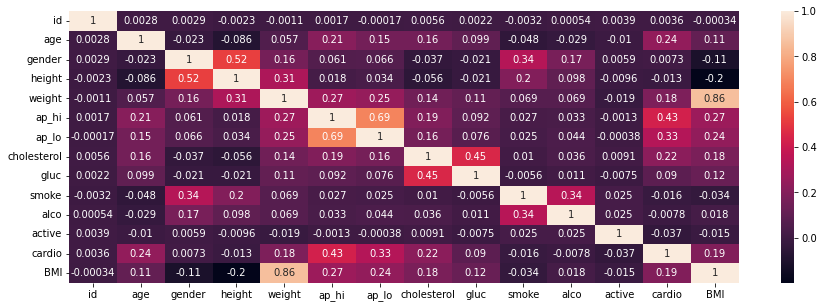

In [9]:
df_heatmap_data = df_medical_data_clean.drop(columns=["Blood_pressure_class", "BMI_class"], axis = 1)

plt.figure(figsize=(15,5))
sns.heatmap(df_medical_data_clean.corr(), annot=True)

- The height has a negative corralation with bmi because even though it is in the calculation it is such a low value because it is defiend in meters.
- The weight corralates better with BMI because it has a bigger impact within the calculation
- The corralation between ap_hi and ap_lo i high because both deal with blood pressure.
- The blood pressure and cardio corralate because the heart works hard to pump the blood around the body which leads to the wearing it self out
    - https://pubmed.ncbi.nlm.nih.gov/31865786/
- Gender and BMI has a negative corralation because the BMI is calcualted from weight and height. Meaning both genders can have a high or low BMI which is changes based on what the person does to its body

## Machine learing disease prediction

In [37]:
df_medical_data_1 = df_medical_data_clean.drop(["ap_hi", "ap_lo", "weight", "height", "BMI"], axis=1)
df_medical_data_2 = df_medical_data_clean.drop(["BMI_class", "Blood_pressure_class", "height", "weight"], axis=1)

df_blood_BMI_gender_onehot = pd.get_dummies(df_medical_data_1, columns=["BMI_class", "Blood_pressure_class", "gender"], drop_first=True)
df_gender_onehot = pd.get_dummies(df_medical_data_2, columns=["gender"], drop_first=True)

In [99]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## Import needed libraries from sklearn

In [12]:
standardscaler = StandardScaler()
minmaxscaler = MinMaxScaler()

In [79]:
X_1, y_1 = df_medical_data_1.drop(["cardio", "BMI_class", "Blood_pressure_class"], axis=1), df_medical_data_1["cardio"]
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.33, random_state=42) 
X_train_val_1, X_validation_1, y_train_val_1, y_validation_1 = train_test_split(X_train_1, y_train_1, test_size=0.33, random_state=42)
## Splits the first dataset into Train | Validation | Test datasets for training, validation and testing the machinelearing algorithems

X_2, y_2 = df_medical_data_2.drop("cardio", axis=1), df_medical_data_2["cardio"]
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.33, random_state=42)
X_train_val_2, X_validation_2, y_train_val_2, y_validation_2 = train_test_split(X_train_1, y_train_1, test_size=0.33, random_state=42)
## Splits the second dataset into Train | Validation | Test datasets for training, validation and testing the machinelearing algorithems

### Hyperparameter tuning
- GridsearchCV

#### KNN Hyperparamaeter tuning

In [80]:
pipeline_KNN = Pipeline([("scaler", None), ("knn", KNeighborsClassifier())])
param_grid_KNN = {"knn__n_neighbors": list(range(1, 50)), "scaler": [StandardScaler(), MinMaxScaler()]}
classifier_KNN = GridSearchCV(estimator=pipeline_KNN, cv=5, scoring="accuracy", verbose=1, param_grid=param_grid_KNN)
classifier_KNN.fit(X_train_val_1, y_train_val_1)

Fitting 5 folds for each of 98 candidates, totalling 490 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', None),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...],
                         'scaler': [StandardScaler(), MinMaxScaler()]},
             scoring='accuracy', verbose=1)

In [111]:
classifier_KNN.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=49))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=49),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 49,
 'knn__p': 2,
 'knn__weights': 'uniform'}

#### Decision tree Hyperparameter tuning

In [82]:
pipeline_DT = Pipeline([("scaler", None), ("decisionTree", DecisionTreeClassifier())])
param_grid_DT = {"scaler": [StandardScaler(), MinMaxScaler()], "decisionTree__criterion": ["gini", "entropy"], "decisionTree__splitter": ["best", "random"]}
classifier_DT = GridSearchCV(estimator=pipeline_DT, cv=5, scoring="accuracy", verbose=1, param_grid=param_grid_DT)
classifier_DT.fit(X_train_val_1, y_train_val_1)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', None),
                                       ('decisionTree',
                                        DecisionTreeClassifier())]),
             param_grid={'decisionTree__criterion': ['gini', 'entropy'],
                         'decisionTree__splitter': ['best', 'random'],
                         'scaler': [StandardScaler(), MinMaxScaler()]},
             scoring='accuracy', verbose=1)

In [112]:
classifier_DT.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('decisionTree',
   DecisionTreeClassifier(criterion='entropy', splitter='random'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'decisionTree': DecisionTreeClassifier(criterion='entropy', splitter='random'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'decisionTree__ccp_alpha': 0.0,
 'decisionTree__class_weight': None,
 'decisionTree__criterion': 'entropy',
 'decisionTree__max_depth': None,
 'decisionTree__max_features': None,
 'decisionTree__max_leaf_nodes': None,
 'decisionTree__min_impurity_decrease': 0.0,
 'decisionTree__min_samples_leaf': 1,
 'decisionTree__min_samples_split': 2,
 'decisionTree__min_weight_fraction_leaf': 0.0,
 'decisionTree__random_state': None,
 'decisionTree__splitter': 'random'}

#### Logistic regression hyperparameter tuning

In [84]:
pipeline_Logistic = Pipeline([("scaler", None), ("logistic", LogisticRegression())])
param_grid_Log = {
    "scaler": [StandardScaler(), MinMaxScaler()], 
    "logistic__penalty": ["l1", "l2", "elasticnet"],
    "logistic__solver": ["saga"],
    "logistic__l1_ratio": [0.1, 0.2, 0.5, 0.75, 1]
}
classifier_Log = GridSearchCV(estimator=pipeline_Logistic, cv=5, scoring="accuracy", verbose=1, param_grid=param_grid_Log)
classifier_Log.fit(X_train_val_1, y_train_val_1)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\FabianAndersson-AIU2\.virtualenvs\Machinelearning-Fabian-Andersson-w7oPBvBJ\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\FabianAndersson-AIU2\.virtualenvs\Machinelearning-Fabian-Andersson-w7oPBvBJ\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\FabianAndersson-AIU2\.virtualenvs\Machinelearning-Fabian-Andersson-w7oPBvBJ\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\FabianAndersson-AIU2\.virtualenvs\Machinelearning-Fabian-Andersson-w7oPBvBJ\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warning

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', None),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__l1_ratio': [0.1, 0.2, 0.5, 0.75, 1],
                         'logistic__penalty': ['l1', 'l2', 'elasticnet'],
                         'logistic__solver': ['saga'],
                         'scaler': [StandardScaler(), MinMaxScaler()]},
             scoring='accuracy', verbose=1)

In [ ]:
classifier_Log.best_estimator_.get_params()

### Testing for the best model

#### Dataset 1

              precision    recall  f1-score   support

           0       0.72      0.70      0.71      7713
           1       0.70      0.71      0.70      7461

    accuracy                           0.71     15174
   macro avg       0.71      0.71      0.71     15174
weighted avg       0.71      0.71      0.71     15174



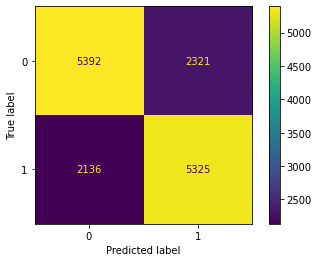

In [93]:
pipeline_KNN.fit(X_train_1, y_train_1)
y_val_pred_KNN_1 = pipeline_KNN.predict(X_validation_1)
print(classification_report(y_validation_1, y_val_pred_KNN_1))
cm = confusion_matrix(y_validation_1, y_val_pred_KNN_1)
ConfusionMatrixDisplay(cm).plot() ## Evaluates the pipeline model for Kneighborsclassifier with the first dataset

              precision    recall  f1-score   support

           0       0.56      0.55      0.56      7713
           1       0.55      0.56      0.55      7461

    accuracy                           0.55     15174
   macro avg       0.55      0.55      0.55     15174
weighted avg       0.55      0.55      0.55     15174



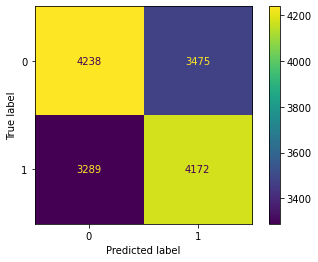

In [104]:
pipeline_DT.fit(X_train_val_1, y_train_val_1)
y_val_pred_DT_1 = pipeline_DT.predict(X_validation_1)
print(classification_report(y_validation_1, y_val_pred_DT_1))
cm = confusion_matrix(y_validation_1, y_val_pred_DT_1)
ConfusionMatrixDisplay(cm).plot() ## Evaluates the Decision tree model with dataset 1

              precision    recall  f1-score   support

           0       0.53      0.37      0.44      7713
           1       0.51      0.66      0.57      7461

    accuracy                           0.52     15174
   macro avg       0.52      0.52      0.51     15174
weighted avg       0.52      0.52      0.50     15174



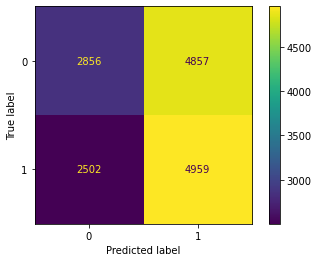

In [106]:
pipeline_Logistic.fit(X_train_val_1, y_train_val_1)
y_val_pred_Logistic_1 = pipeline_Logistic.predict(X_validation_1)
print(classification_report(y_validation_1, y_val_pred_Logistic_1))
cm = confusion_matrix(y_validation_1, y_val_pred_Logistic_1)
ConfusionMatrixDisplay(cm).plot() ## Evaluates the model for logistic regression with the first dataset

#### Dataset 2

              precision    recall  f1-score   support

           0       0.53      0.52      0.52      7713
           1       0.51      0.52      0.52      7461

    accuracy                           0.52     15174
   macro avg       0.52      0.52      0.52     15174
weighted avg       0.52      0.52      0.52     15174



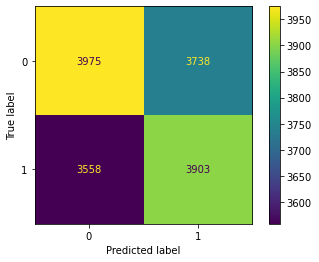

In [113]:
pipeline_KNN.fit(X_train_val_2, y_train_val_2)
y_val_pred_KNN_2 = pipeline_KNN.predict(X_validation_2)
print(classification_report(y_validation_2, y_val_pred_KNN_2))
cm = confusion_matrix(y_validation_2, y_val_pred_KNN_2)
ConfusionMatrixDisplay(cm).plot() ## Evaluates the pipeline model for Kneighborsclassifier with dataset 2

              precision    recall  f1-score   support

           0       0.53      0.52      0.52      7713
           1       0.51      0.52      0.52      7461

    accuracy                           0.52     15174
   macro avg       0.52      0.52      0.52     15174
weighted avg       0.52      0.52      0.52     15174



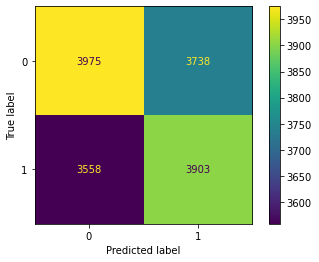

In [116]:
pipeline_DT.fit(X_train_val_2, y_train_val_2)
y_val_pred_DT_2 = pipeline_KNN.predict(X_validation_2)
print(classification_report(y_validation_2, y_val_pred_DT_2))
cm = confusion_matrix(y_validation_2, y_val_pred_DT_2)
ConfusionMatrixDisplay(cm).plot()

              precision    recall  f1-score   support

           0       0.53      0.52      0.52      7713
           1       0.51      0.52      0.52      7461

    accuracy                           0.52     15174
   macro avg       0.52      0.52      0.52     15174
weighted avg       0.52      0.52      0.52     15174



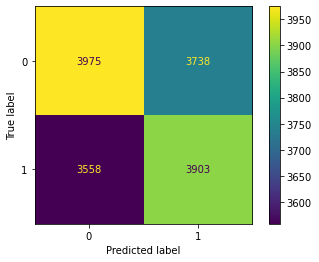

In [117]:
pipeline_Logistic.fit(X_train_val_2, y_train_val_2)
y_val_pred_Log_2 = pipeline_KNN.predict(X_validation_2)
print(classification_report(y_validation_2, y_val_pred_Log_2))
cm = confusion_matrix(y_validation_2, y_val_pred_Log_2)
ConfusionMatrixDisplay(cm).plot()